In [ ]:
# Install packages if needed
%pip install numpy
%pip install matplotlib
%pip install tensorflow
%pip install scikit-image
%pip install scikit-learn

In [2]:
# Packages
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import skimage

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io

print("Python version: ", sys.version)
print("Numpy version: ", np.__version__)
print("Tensorflow version: ", tf.__version__)
print("Scikit-Learn version: ", sklearn.__version__)

Python version:  3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Numpy version:  1.26.4
Tensorflow version:  2.16.1
Scikit-Learn version:  1.4.1.post1


In [3]:
# Loading data
def load_asl(verbose=False):
    # Data directories
    train_dir = "./Data/asl_alphabet_train/"
    test_dir = "./Data/asl_alphabet_test/"

    img_height = 128 # Had to make smaller because I don't have enough memory to do the 200x200 images
    img_width = 128
    batch_size = 16

    # Loading with no augmentation, we will add it here if we want it
    train_datagenerator = ImageDataGenerator(rescale = 1./255, validation_split = 0.1) # Pixel value normalization
    test_datagenerator = ImageDataGenerator(rescale = 1./255)

    train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size = (img_height, img_width),
        batch_size = batch_size,
        class_mode = 'categorical',
        subset = 'training',
    )

    val_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size = (img_height, img_width),
        class_mode = 'categorical',
        batch_size = batch_size,
        subset = 'validation',
        
    )

    test_generator = test_datagenerator.flow_from_directory(
        test_dir,
        target_size = (img_height, img_width),
        class_mode = 'categorical',
        shuffle = False
    )

    # Note that this dataset already comes with a separate test folder that we will use
    # This means that this split is only for splitting train and val data

    print("Number of training samples:", train_generator.n)
    print("Number of validation samples:", val_generator.n)

    return train_generator, val_generator, test_generator

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 0 images belonging to 0 classes.
Number of training samples: 78300
Number of validation samples: 8700


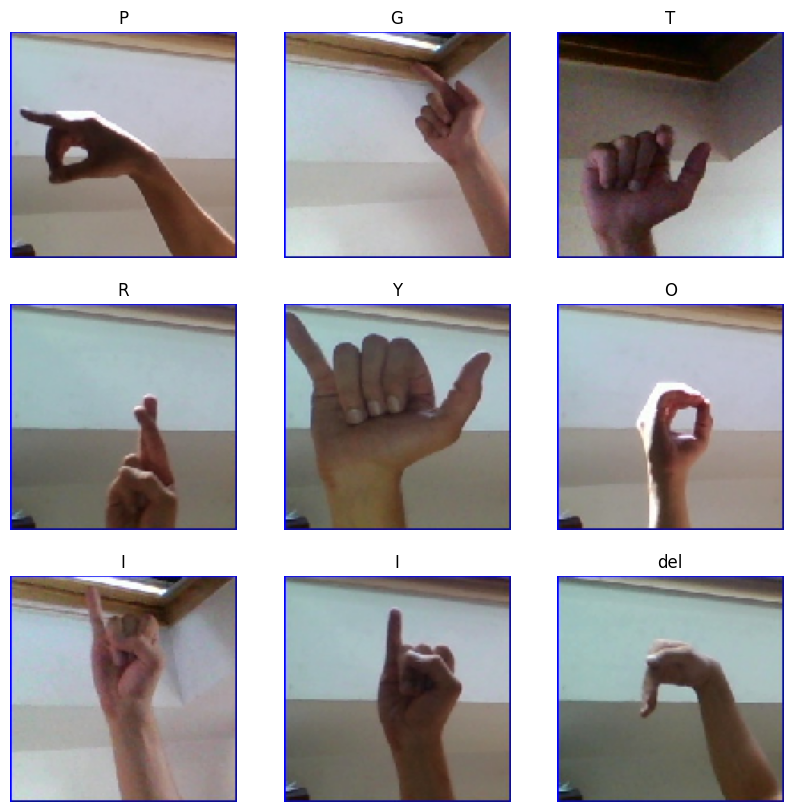

In [4]:
# Explore random pieces of the data
train_generator, validation_generator, test_generator = load_asl()
# Get a batch of data from the generator
images, labels = next(train_generator)
class_names = train_generator.class_indices

decoded_labels = [list(class_names.keys())[np.argmax(label)] for label in labels]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_name = decoded_labels[i]  # Get the class name directly from the labels array
    plt.title(label_name)  # Set the title to the class name
    plt.axis("off")
plt.show()

In [7]:
# More code prepartion
train_x = []
train_y = []
train_x_flat = []
val_x = []
val_x_flat = []
val_y = []

for i in range(len(train_generator)):
    batch_x, batch_y = train_generator[i]
    batch_x_flat = batch_x.reshape(batch_x.shape[0], -1)
    train_x_flat.append(batch_x_flat)
    train_y.append(batch_y)
    print("Progress: {} of {} batches".format(i, len(train_generator)), end="\r", flush=True)
    del batch_x_flat, batch_x, batch_y

for j in range(len(validation_generator)):
    batch_x, batch_y = validation_generator[j]
    batch_x_flat = batch_x.reshape(batch_x.shape[0], -1)
    val_x_flat.append(batch_x_flat)
    val_y.append(batch_y)
    print("Progress: {} of {} batches".format(j, len(validation_generator)), end="\r", flush=True)
    del batch_x_flat, batch_x, batch_y

train_x = np.concatenate(train_x_flat)
train_y = np.concatenate(train_y) # not flattened

val_x = np.concatenate(val_x_flat)
val_y = np.concatenate(val_y) # not flattened

# Flattened data if needed
# SVM, Random forests, etc

# For not flattened data, we will just use the generators